In [2]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

In [15]:
import open3d as o3d

# Load SMPL-X mesh
smplx_mesh = o3d.io.read_triangle_mesh("smplx_uv.obj")

# Load texture
smplx_mesh.textures = [o3d.io.read_image("smplx_uv_white.png")]

# Visualize
o3d.visualization.draw_geometries([smplx_mesh])

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.
[Open3D WARNING] Unable to load file smplx_uv.obj with ASSIMP: Unable to open file "smplx_uv.obj".
[Open3D WARNING] Read geometry::Image failed for file smplx_uv_white.png. I/O error.
[Open3D WARNING] The number of points is 0 when creating axis-aligned bounding box.


In [5]:
texture = o3d.io.read_image("smplx_uv.png")
np.array(texture).size

: 

In [14]:
im = Image.open("../smplx_uv.png")
im_arr = np.array(im)
im_arr.shape, im_arr.dtype, im_arr.min(), im_arr.max()
im_color = np.ones_like(im_arr) * [15, 100, 60, 255]
im_color = Image.fromarray(im_color.astype(np.uint8))
# im_color.show()
im_color.save("../smplx_uv_white.png")

### flip the UV texture (for O3D read image only)

In [21]:
import torch

def flip_y_axis(image: torch.Tensor) -> torch.Tensor:
    """
    Flips a PyTorch tensor image along the y-axis (vertically).
    
    Args:
        image (torch.Tensor): Image tensor of shape (C, H, W)
        
    Returns:
        torch.Tensor: Flipped image
    """
    return torch.flip(image, dims=[0])  # Flip along height (y-axis)

# Example usage
image_original = Image.open("../smplx_uv.png")
# image_original.show()
image = torch.tensor(np.array(image_original)) # Example random image (C, H, W)
flipped_image = flip_y_axis(image)
Image.fromarray(flipped_image.numpy().astype(np.uint8)).save("../smplx_uv_flipped.png")

def flip_Image(image: Image) -> Image:
    """
    Flips a PIL Image along the y-axis (vertically).
    
    Args:
        image (Image): PIL Image
        
    Returns:
        Image: Flipped image
    """
    return image.transpose(Image.FLIP_TOP_BOTTOM)


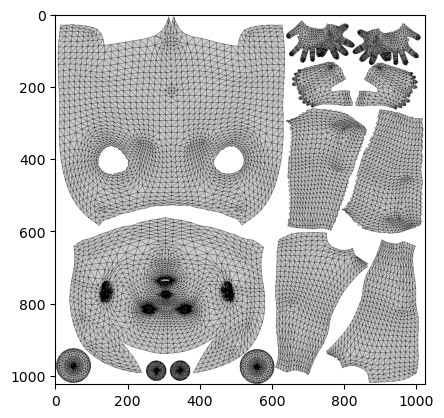

In [47]:

new_im = im.transpose(Image.FLIP_TOP_BOTTOM)
plt.imshow(im.transpose(Image.FLIP_TOP_BOTTOM))

### resize the texture map

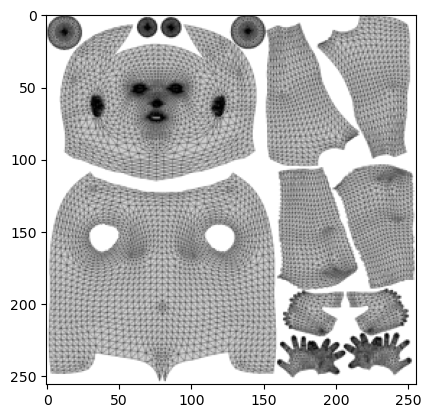

In [48]:
plt.imshow(im.resize((256, 256)))
im.resize((256, 256)).transpose(Image.FLIP_TOP_BOTTOM).save("../smplx_uv_resized.png")

## Colored UV

U:
 [[0.00000000e+00 9.77517107e-04 1.95503421e-03 ... 9.98044966e-01
  9.99022483e-01 1.00000000e+00]
 [0.00000000e+00 9.77517107e-04 1.95503421e-03 ... 9.98044966e-01
  9.99022483e-01 1.00000000e+00]
 [0.00000000e+00 9.77517107e-04 1.95503421e-03 ... 9.98044966e-01
  9.99022483e-01 1.00000000e+00]
 ...
 [0.00000000e+00 9.77517107e-04 1.95503421e-03 ... 9.98044966e-01
  9.99022483e-01 1.00000000e+00]
 [0.00000000e+00 9.77517107e-04 1.95503421e-03 ... 9.98044966e-01
  9.99022483e-01 1.00000000e+00]
 [0.00000000e+00 9.77517107e-04 1.95503421e-03 ... 9.98044966e-01
  9.99022483e-01 1.00000000e+00]]
V:
 [[1.00000000e+00 1.00000000e+00 1.00000000e+00 ... 1.00000000e+00
  1.00000000e+00 1.00000000e+00]
 [9.99022483e-01 9.99022483e-01 9.99022483e-01 ... 9.99022483e-01
  9.99022483e-01 9.99022483e-01]
 [9.98044966e-01 9.98044966e-01 9.98044966e-01 ... 9.98044966e-01
  9.98044966e-01 9.98044966e-01]
 ...
 [1.95503421e-03 1.95503421e-03 1.95503421e-03 ... 1.95503421e-03
  1.95503421e-03 1.95503

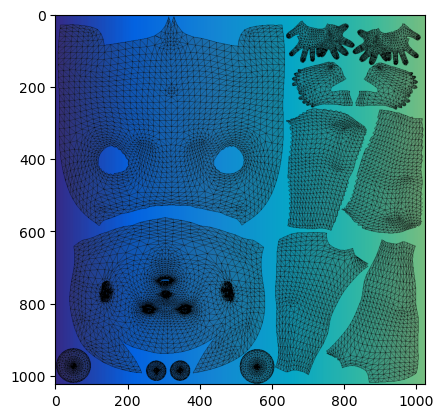

In [189]:

def get_uv_coords(height ,width):
    # TODO: check the vu-hw correspondence
    u = np.linspace(0, 1, width)
    # v = np.linspace(0, 1, height)
    # u = np.linspace(1, 0, width)
    v = np.linspace(1, 0, height)
    U, V = np.meshgrid(u, v)
    # U, V = np.meshgrid(u, v)
    print("U:\n", U)
    print("V:\n", V)
    # return np.stack([U, V, U], axis=-1)
    # return np.stack([U, V, np.ones_like(U)*0], axis=-1)
    # return np.stack([np.ones_like(U)*0, U, V],  axis=-1)
    return np.stack([np.ones_like(U)*0, U, np.zeros_like(U)],  axis=-1)

# u = np.linspace(0, 1, 1024)
# v = np.linspace(0, 1, 1024)
# U, V = np.meshgrid(u, v)
# tex_coords = np.stack([np.ones_like(U)*0, U, V], axis=-1)

import cv2
def apply_parula_colormap(uv_coords):
    """
    Maps the UV coordinates to OpenCV's COLORMAP_PARULA.
    
    Args:
        uv_coords (np.ndarray): UV map of shape (H, W, 3)

    Returns:
        np.ndarray: Colored image (H, W, 3) mapped to COLORMAP_PARULA
    """
    # Normalize the V channel (Y-axis) to [0, 255] for colormap
    grayscale_uv = (uv_coords * 255).astype(np.uint8)
    
    # Apply COLORMAP_PARULA
    colored_uv = cv2.applyColorMap(grayscale_uv, cv2.COLORMAP_PARULA)
    
    return colored_uv

tex_coords = get_uv_coords(1024, 1024)
print(tex_coords.shape)
# tex_coords = tex_coords.mean(axis=-1).repeat(3).reshape(1024, 1024, 3)
# tex_coords = tex_coords.mean(axis=-1).repeat(3).reshape(1024, 1024, 3)
tex_coords = apply_parula_colormap(tex_coords)
print(tex_coords.shape)
# tex_coords.min(), tex_coords.max()
cv2.imwrite("../smplx_uv_color.png", tex_coords)
plt.imshow(plt.imread("../smplx_uv_color.png"))

plt.imshow(plt.imread("../smplx_uv_flipped.png"))

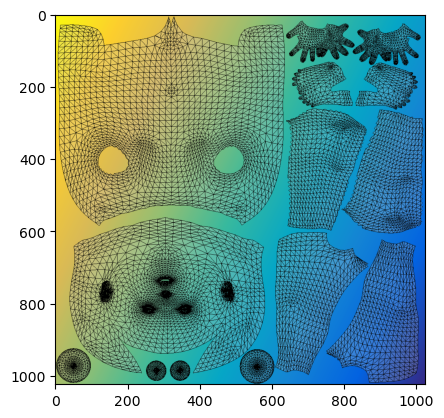

In [11]:
# overlay images
im1 = Image.open("../smplx_uv_flipped.png")
im2 = Image.open("../smplx_uv_color.png")

# im1 = im1.convert("RGB")
# print(np.array(im1).shape, np.array(im2).shape)
# im_overlay = Image.blend(im1, im2, alpha=0.5)

im1 = np.array(im1) / 255.0
im2 = np.array(im2) / 255.0
im_overlay = im1[..., :3] + im2 * (1 - im1[..., 3:])
im_overlay = Image.fromarray((im_overlay * 255).astype(np.uint8)) 

im_overlay.save("../smplx_uv_overlay.png")
# im_overlay.show()
plt.imshow(im_overlay)

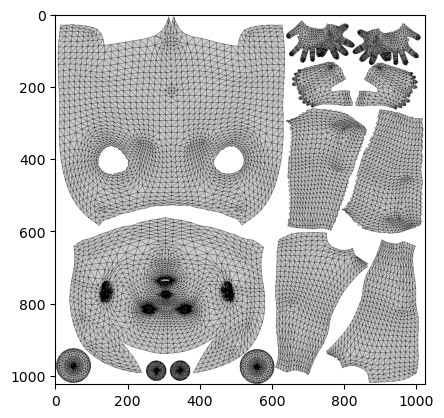

In [148]:
plt.imshow(plt.imread("../smplx_uv_flipped.png"))

## UV -> Atlas -> UV

In [16]:
from UVTextureConverter import Normal2Atlas
from UVTextureConverter import Atlas2Normal
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

(512, 512, 3)


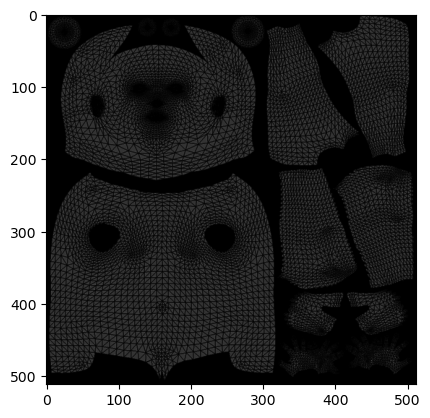

In [17]:
normal_tex = np.array(Image.open("../smplx_uv.png").resize((512, 512)))
normal_tex = normal_tex[:, :, :3]
print(normal_tex.shape)
plt.imshow(normal_tex)


(800, 1200, 3) 0.0 0.39215686274509803


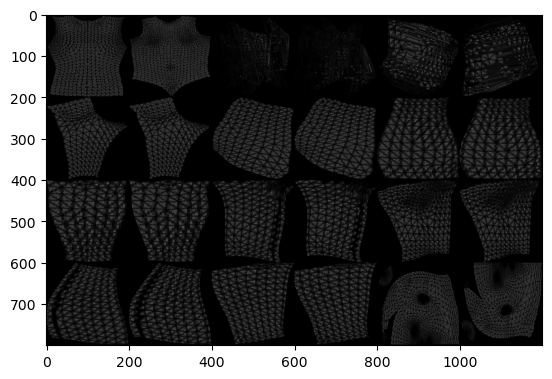

In [18]:
converter = Normal2Atlas(normal_size=512, atlas_size=200)
atlas_texture = converter.convert(normal_tex)
im = Normal2Atlas.concat_atlas_tex(atlas_texture)
print(im.shape, im.min(), im.max())
im_255 = (im * 255).astype(np.uint8)
plt.imshow(im_255)

(800, 1200, 3)
(1024, 1024, 3) 3 225 uint8
U:
 [[0.         0.         0.         ... 0.         0.         0.        ]
 [0.00502513 0.00502513 0.00502513 ... 0.00502513 0.00502513 0.00502513]
 [0.01005025 0.01005025 0.01005025 ... 0.01005025 0.01005025 0.01005025]
 ...
 [0.98994975 0.98994975 0.98994975 ... 0.98994975 0.98994975 0.98994975]
 [0.99497487 0.99497487 0.99497487 ... 0.99497487 0.99497487 0.99497487]
 [1.         1.         1.         ... 1.         1.         1.        ]]
V:
 [[1.         0.99497487 0.98994975 ... 0.01005025 0.00502513 0.        ]
 [1.         0.99497487 0.98994975 ... 0.01005025 0.00502513 0.        ]
 [1.         0.99497487 0.98994975 ... 0.01005025 0.00502513 0.        ]
 ...
 [1.         0.99497487 0.98994975 ... 0.01005025 0.00502513 0.        ]
 [1.         0.99497487 0.98994975 ... 0.01005025 0.00502513 0.        ]
 [1.         0.99497487 0.98994975 ... 0.01005025 0.00502513 0.        ]]
(800, 1200, 3) 0.0 255.0


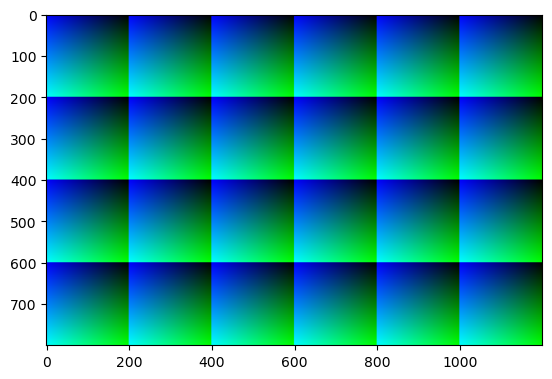

In [208]:

color_mode = "per_tile_uv"
print(im_255.shape)
print(tex_coords.shape, tex_coords.min(), tex_coords.max(), tex_coords.dtype)


def get_uv_coords(height ,width):
    # TODO: check the vu-hw correspondence
    # u = np.linspace(0, 1, width)
    v = np.linspace(0, 1, height)
    u = np.linspace(1, 0, width)
    # v = np.linspace(1, 0, height)
    V, U = np.meshgrid(u, v)
    # U, V = np.meshgrid(u, v)
    print("U:\n", U)
    print("V:\n", V)
    # return np.stack([U, V, U], axis=-1)
    # return np.stack([U, V, np.ones_like(U)*0], axis=-1)
    return np.stack([np.ones_like(U)*0, U, V],  axis=-1)
    # # return np.stack([np.ones_like(U)*0, U, np.zeros_like(U)],  axis=-1) ## verify U
    # return np.stack([np.ones_like(U)*0, np.zeros_like(U), V],  axis=-1) ## verify V

if color_mode == "whole":
    
    im_255_blend = Image.fromarray(im_255)
    
    uv_color = Image.open("../smplx_uv_color.png").resize(im_255_blend.size)
    plt.imshow(uv_color)
    
    # blend the color with the atlas texture
    im_255_blend = Image.blend(im_255_blend, uv_color, alpha=0.8)
    plt.imshow(im_255_blend)
    im_255_blend = np.array(im_255_blend)
elif color_mode == "per_tile_uv":
    im_255_blend = Image.fromarray(im_255)
    
    uv_color_aparula = False
    if uv_color_aparula:
        uv_color =  Image.open("../smplx_uv_color.png").resize((200, 200))
        uv_color = np.array(uv_color)
    else:
        # uv_color = np.zeros((200, 200, 3), dtype=np.uint8)
        uv_color = get_uv_coords(200, 200) * 255
    uv_color = np.tile(uv_color, (4, 6, 1))
    print(uv_color.shape, uv_color.min(), uv_color.max())
    uv_color = Image.fromarray(uv_color.astype(np.uint8)).resize(im_255_blend.size)
    plt.imshow(uv_color)
    
    # blend the color with the atlas texture
    im_255_blend = Image.blend(im_255_blend, uv_color, alpha=1)
    plt.imshow(im_255_blend)
    im_255_blend = np.array(im_255_blend)

elif color_mode == "single_tile":
    im_255_blend = Image.fromarray(im_255)
    
    uv_color =  Image.open("../smplx_uv_color.png").resize((200, 200))
    uv_color = np.array(uv_color)
    uv_color = np.tile(uv_color, (4, 6, 1))
    index_to_view = 23
    x = (index_to_view - 1) % 6
    y = (index_to_view - 1) // 6
    uv_color[y*200:(y+1)*200, x*200:(x+1)*200, :] = (255,0,0)
    print(uv_color.shape, uv_color.min(), uv_color.max())
    uv_color = Image.fromarray(uv_color.astype(np.uint8)).resize(im_255_blend.size)
    plt.imshow(uv_color)
    
    # blend the color with the atlas texture
    im_255_blend = Image.blend(im_255_blend, uv_color, alpha=0.5)
    plt.imshow(im_255_blend)
    im_255_blend = np.array(im_255_blend)

elif color_mode == "per_tile_i":
    im_255_blend = Image.fromarray(im_255)
    
    uv_color =  Image.open("../smplx_uv_color.png").resize((200, 200))
    uv_color = np.array(uv_color)
    uv_color = np.tile(uv_color, (4, 6, 1))
    for index_to_view in range(1, 25):
        x = (index_to_view - 1) % 6
        y = (index_to_view - 1) // 6
        uv_color[y*200:(y+1)*200, x*200:(x+1)*200, :] = (index_to_view * 10,0,0)
    
    
    print(uv_color.shape, uv_color.min(), uv_color.max())
    uv_color = Image.fromarray(uv_color.astype(np.uint8)).resize(im_255_blend.size)
    plt.imshow(uv_color)
    
    # blend the color with the atlas texture
    # im_255_blend = Image.blend(im_255_blend, uv_color, alpha=1)
    im_255_blend = uv_color
    plt.imshow(im_255_blend)
    im_255_blend = np.array(im_255_blend)
    
else:
    im_255_blend = im_255

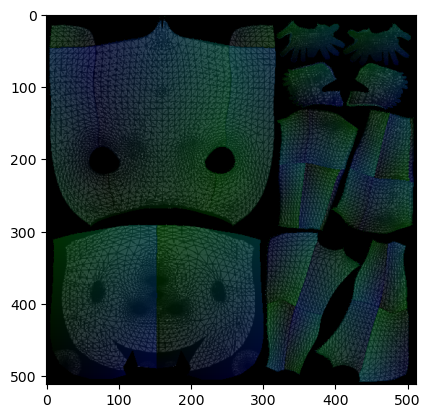

In [181]:
# plt.imshow(normal_tex_im.transpose(Image.FLIP_TOP_BOTTOM).transpose(Image.FLIP_LEFT_RIGHT))
plt.imshow(normal_tex_im.transpose(Image.FLIP_TOP_BOTTOM).rotate(0))

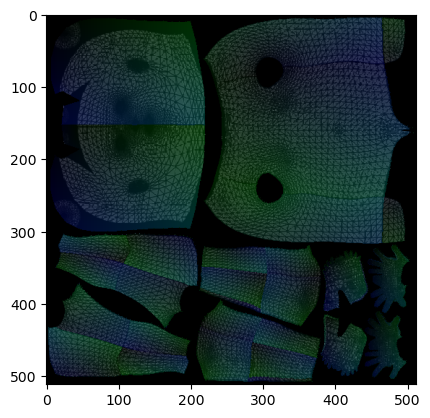

In [182]:
plt.imshow(normal_tex_im.transpose(Image.FLIP_TOP_BOTTOM).rotate(-90))

0.0 1.0 (512, 512, 3)
float64


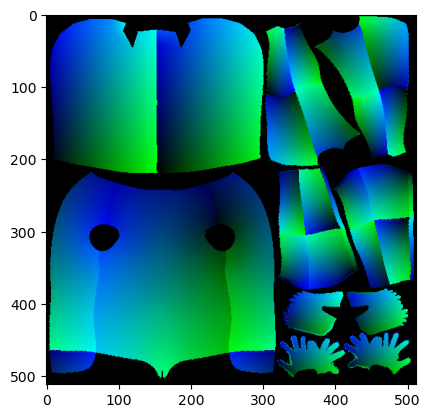

In [209]:
atlas_tex_stack = Atlas2Normal.split_atlas_tex(im_255_blend)

converter = Atlas2Normal(atlas_size=200, normal_size=512)
normal_tex = converter.convert(atlas_tex_stack)
# normal_tex = np.flip(normal_tex, 0)

print(normal_tex.min(), normal_tex.max(), normal_tex.shape)
print(normal_tex.dtype)
normal_tex_im = Image.fromarray((normal_tex * 255).astype(np.uint8))
normal_tex_im.save("../smplx_uv_altas_colored.png")

plt.imshow(normal_tex_im)
# plt.imsave("../smplx_uv_altas_colored.png", normal_tex)

# save the non-flipped normal texture

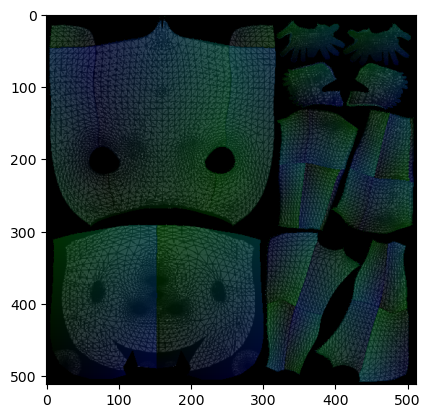

## Check Rendered Image

(1024, 1024, 3) 0 216
[  0  20  28  33  38  42  46  49  52  55  58  61  63  65  68  70  72  74
  76  78  80  81  83  85  87  88  90  91  93  94  96  97  99 100 102 103
 104 106 107 108 109 111 112 113 114 115 117 118 119 120 121 122 123 124
 125 126 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216]
145


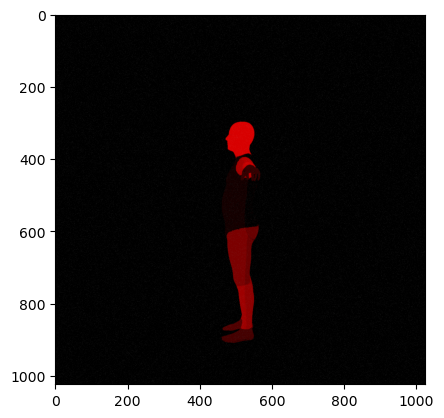

In [131]:
rendered_img_path = "/home/liu-compute/Repo/UVTextureConverter/renders/render_0.png"
# rendered_img_path = "/home/xuyimeng/Repo/Cat3D/overlay_iuv_i.png"
rendered_img = Image.open(rendered_img_path)
# rendered_img = rendered_img.resize((512, 512))
rendered_img = np.array(rendered_img)
print(rendered_img.shape, rendered_img.min(), rendered_img.max())
unique_values = np.unique(rendered_img)
print(unique_values)
print(len(unique_values))
plt.imshow(rendered_img)